In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#@title Acceder al Drive

# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/drive')

# directorio local en Google Drive
path = '/content/drive/MyDrive/'  #@param {type:"string"}


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data_file = 'academic-corpus.csv'  #@param {type:"string"}
delimitador_columnas = ',' #@param {type:"string"}


In [7]:
npr = pd.read_csv(path + data_file,
                  quotechar='"',
                  on_bad_lines='skip',
                  parse_dates=['Date'],
                  na_values=[],  # Trata las celdas vacías como cadenas vacías en lugar de NaN
                  keep_default_na=False)

In [8]:
npr.head()

,Document Title,Authors,Author Affiliations,Publication Title,Date,Publication Year,Volume,Issue,Start Page,End Page,...,Mesh_Terms,Article Citation Count,Patent Citation Count,Reference Count,License,Online Date,Issue Date,Meeting Date,Publisher,Document Identifier
0,Evaluating the Software Architecture Competenc...,L. Bass; P. Clements; R. Kazman; M. Klein,"Software Engineering Institute, Carnegie Mello...",Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,249,252,...,,9.0,,8.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences
1,A Modifiable Agent-Based Software Architecture...,G. Mendez; A. de Antonio,Computer Science School Technical University o...,Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,319,322,...,,1.0,,12.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences
2,Software Architecture Challenges for Data Inte...,I. Gorton,"Pacific Northwest National Laboratory, Richlan...",Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,4,6,...,,9.0,,4.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences
3,Importance of Software Architecture during Rel...,M. Lindgren; C. Norstrom; A. Wall; R. Land,"ABB Force Measurement, Vasteras, Sweden; Depar...",Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,253,256,...,,8.0,,11.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences
4,A Software Architecture for Cross-Layer Wirele...,S. -H. Choi; D. E. Perry; S. M. Nettles,Department of Electrical and Computer Engineer...,Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,281,284,...,,7.0,,11.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences


In [9]:
print(f"Corpus size: {len(npr)} documents")

Corpus size: 12757 documents


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer(max_df=0.9,min_df=2,stop_words='english')

In [12]:
dtm = cv.fit_transform(npr['Detail'])

In [13]:
from sklearn.decomposition import LatentDirichletAllocation

Results loaded from existing file.


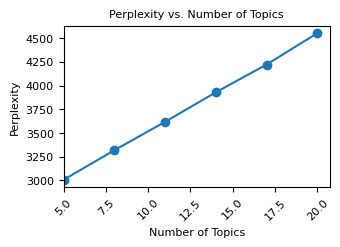

Number of Topics: 5, Perplexity: 3006.8512727470597
Number of Topics: 8, Perplexity: 3318.0337153251503
Number of Topics: 11, Perplexity: 3617.503987854377
Number of Topics: 14, Perplexity: 3929.031137007791
Number of Topics: 17, Perplexity: 4221.778501610256
Number of Topics: 20, Perplexity: 4552.552418347551


In [14]:
from sklearn.model_selection import train_test_split

from tqdm import tqdm

# Results file
results_file = f'perplexities_{data_file}'

# Full path of results file
results_path = f'{path}{results_file}'

# Check if results file already exists
import os
if results_file in os.listdir(path):
    # Load existing results
    results = pd.read_csv(results_path)
    topic_range = results['Number of Topics'].values
    perplexities = results['Perplexity'].values
    print("Results loaded from existing file.")
else:
    # Split data into training and testing sets
    X_train, X_test = train_test_split(dtm, test_size=0.3, random_state=42)

    # Range of topic numbers to test
    topic_range = range(5, 21, 3)

    # Lists to store results
    perplexities = []

    for n_topics in tqdm(topic_range, desc="Training LDA models", unit="topics", bar_format="{l_bar}{bar}| {n}/{total} [{percentage:.0f}%] ({elapsed} elapsed, {remaining} remaining)"):
        # Train LDA model
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(X_train)

        # Calculate perplexity
        perplexity = lda.perplexity(X_test)
        perplexities.append(perplexity)

    # Save results to CSV file
    results = pd.DataFrame({'Number of Topics': topic_range, 'Perplexity': perplexities})
    results.to_csv(results_path, index=False)
    print("Results saved to file.")

# Create figure with custom size
fig, ax = plt.subplots(figsize=(3.5, 2.5))

# Plot perplexity vs. number of topics
ax.plot(topic_range, perplexities, marker='o')
ax.set_xlabel('Number of Topics', fontsize=8)
ax.set_ylabel('Perplexity', fontsize=8)
ax.set_title('Perplexity vs. Number of Topics', fontsize=8)
ax.tick_params(axis='both', labelsize=8)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlim(left=5)  # Start x-axis at 5

plt.tight_layout()
plt.show()

# Print results
for n_topics, perplexity in zip(topic_range, perplexities):
    print(f'Number of Topics: {n_topics}, Perplexity: {perplexity}')

In [15]:
number_of_topics = topic_range[np.argmin(perplexities)]
print(f'Número de Tópicos con menor Perplexity: {number_of_topics}')

Número de Tópicos con menor Perplexity: 5


In [16]:
LDA = LatentDirichletAllocation(n_components=number_of_topics,random_state=42)

In [17]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [18]:
import numpy as np

def display_topic_analysis(lda_model, feature_names, top_n=10):
    for idx, topic in enumerate(lda_model.components_):
        top_indices = topic.argsort()[:-top_n-1:-1]
        top_words = [feature_names[i] for i in top_indices]
        weights = topic[top_indices]
        percentages = (weights / weights.sum()) * 100

        print(f"Topic {idx}: {', '.join(top_words[:3])}")
        print(", ".join(f"{word} ({pct:.1f}%) " for word, pct in zip(top_words, percentages)))
        print()

# Example usage
display_topic_analysis(LDA, cv.get_feature_names_out())

Topic 0: control, paper, software
control (15.7%) , paper (11.1%) , software (11.1%) , based (10.8%) , time (10.0%) , hardware (9.2%) , architecture (8.5%) , real (8.4%) , robot (8.1%) , using (7.1%) 

Topic 1: software, systems, development
software (19.2%) , systems (14.5%) , development (11.8%) , paper (11.0%) , architecture (9.9%) , learning (8.2%) , based (6.6%) , new (6.4%) , safety (6.3%) , platform (6.2%) 

Topic 2: software, architecture, design
software (31.9%) , architecture (17.1%) , design (8.3%) , development (7.1%) , quality (6.9%) , architectural (6.7%) , engineering (6.0%) , systems (5.6%) , paper (5.4%) , research (5.1%) 

Topic 3: software, architecture, model
software (20.6%) , architecture (12.9%) , model (12.6%) , based (9.8%) , systems (9.4%) , design (8.4%) , approach (8.1%) , paper (7.3%) , models (5.7%) , development (5.2%) 

Topic 4: data, network, architecture
data (25.1%) , network (11.8%) , architecture (9.9%) , applications (8.5%) , paper (8.5%) , based (

In [19]:
import numpy as np
from tabulate import tabulate

def display_topic_analysis(lda_model, feature_names, top_n=10):
    """
    Display LDA topic analysis results in IEEE paper format.

    Parameters:
    -----------
    lda_model : LatentDirichletAllocation
        Fitted LDA model
    feature_names : array-like
        List of feature names (words)
    top_n : int, optional (default=10)
        Number of top words to display per topic
    """
    for idx, topic in enumerate(lda_model.components_):
        # Get indices of top words in descending order
        top_indices = topic.argsort()[:-top_n-1:-1]

        # Get words and their weights
        top_words = [feature_names[i] for i in top_indices]
        weights = topic[top_indices]
        percentages = (weights / weights.sum()) * 100

        # Create table data
        table_data = []
        for rank, (word, weight, pct) in enumerate(zip(top_words, weights, percentages), 1):
            table_data.append([
                rank,
                word,
                f"{weight:.1f}",
                f"{pct:.1f}"
            ])

        # Print topic header and main theme
        print(f"\nTopic {idx} Analysis")
        print(f"Main theme: {', '.join(top_words[:3])}")
        print("-" * 60)

        # Print formatted table
        print(tabulate(
            table_data,
            headers=["Rank", "Keyword", "Weight", "Contribution (%)"],
            tablefmt="pipe",
            colalign=("right", "left", "right", "right"),
            floatfmt=".1f"
        ))
        print("\n")

# Example usage
display_topic_analysis(LDA, cv.get_feature_names_out())


Topic 0 Analysis
Main theme: control, paper, software
------------------------------------------------------------
|   Rank | Keyword      |   Weight |   Contribution (%) |
|-------:|:-------------|---------:|-------------------:|
|      1 | control      |   2845.7 |               15.7 |
|      2 | paper        |   2010.1 |               11.1 |
|      3 | software     |   2004.7 |               11.1 |
|      4 | based        |   1962.7 |               10.8 |
|      5 | time         |   1818.5 |               10.0 |
|      6 | hardware     |   1668.0 |                9.2 |
|      7 | architecture |   1548.6 |                8.5 |
|      8 | real         |   1517.4 |                8.4 |
|      9 | robot        |   1469.0 |                8.1 |
|     10 | using        |   1294.5 |                7.1 |



Topic 1 Analysis
Main theme: software, systems, development
------------------------------------------------------------
|   Rank | Keyword      |   Weight |   Contribution (%) |
|-----

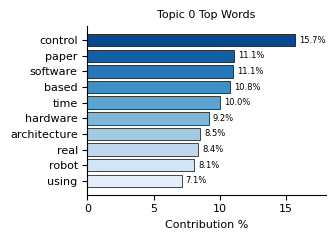

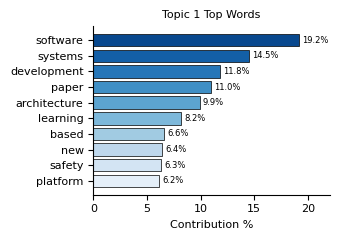

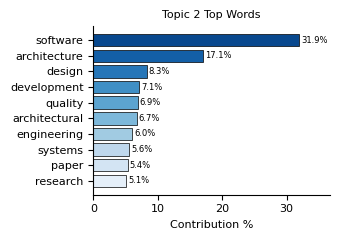

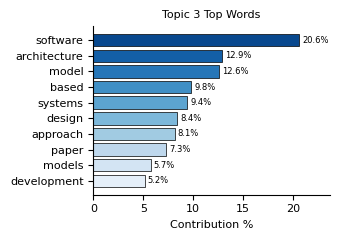

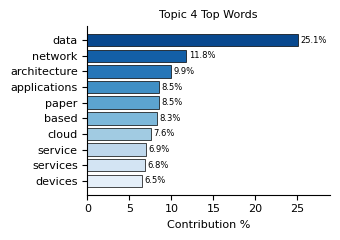

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_ieee_topic_words(lda_model, feature_names, topic_idx, top_n=10,
                         fig_width=3.5, fig_height=2.5):
    """
    Create IEEE-format compatible plot of top words for a given topic
    with right-aligned black percentage labels and thin black borders
    """
    # Get topic weights and words
    topic = lda_model.components_[topic_idx]
    top_indices = topic.argsort()[:-top_n-1:-1]
    top_words = [feature_names[i] for i in top_indices]
    weights = topic[top_indices]

    # Normalize weights to percentages
    weights = (weights / weights.sum()) * 100

    # Create horizontal bar plot with fixed IEEE dimensions
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # Create color palette (dark to light blue) and reverse it
    colors = sns.color_palette("Blues", n_colors=len(weights))[::-1]

    # Plot bars with black edge
    bars = ax.barh(range(len(top_words)), weights, color=colors,
                   edgecolor='black', linewidth=0.5)  # Added black edge

    # Calculate the maximum width for consistent spacing
    max_width = max(weights)

    # Customize appearance
    ax.set_yticks(range(len(top_words)))
    ax.set_yticklabels(top_words, fontsize=8)
    ax.set_xlabel('Contribution %', fontsize=8)
    ax.set_title(f'Topic {topic_idx} Top Words', fontsize=8)

    # Set x-axis limits with padding for labels
    ax.set_xlim(0, max_width * 1.15)  # Add 15% padding for labels

    # Add percentage labels to the right of bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 0.3, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%',
                ha='left', va='center', fontsize=6,
                color='black')  # Black text

    # Invert y-axis to have highest percentages at the top
    ax.invert_yaxis()

    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Adjust layout
    ax.tick_params(axis='both', labelsize=8)
    plt.tight_layout()

    return fig, ax

# Use the function
for i in range(LDA.n_components):
    fig, ax = plot_ieee_topic_words(LDA, cv.get_feature_names_out(), i)
    plt.show()

In [21]:
dtm

<12757x16425 sparse matrix of type '<class 'numpy.int64'>'
	with 803986 stored elements in Compressed Sparse Row format>

In [22]:
topic_results = LDA.transform(dtm)

In [23]:
topic_results.shape

(12757, 5)

In [24]:
topic_results[0].round(2)

array([0.  , 0.22, 0.76, 0.  , 0.  ])

In [25]:
topic_results[0].argmax()

2

In [26]:
npr.head()

,Document Title,Authors,Author Affiliations,Publication Title,Date,Publication Year,Volume,Issue,Start Page,End Page,...,Mesh_Terms,Article Citation Count,Patent Citation Count,Reference Count,License,Online Date,Issue Date,Meeting Date,Publisher,Document Identifier
0,Evaluating the Software Architecture Competenc...,L. Bass; P. Clements; R. Kazman; M. Klein,"Software Engineering Institute, Carnegie Mello...",Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,249,252,...,,9.0,,8.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences
1,A Modifiable Agent-Based Software Architecture...,G. Mendez; A. de Antonio,Computer Science School Technical University o...,Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,319,322,...,,1.0,,12.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences
2,Software Architecture Challenges for Data Inte...,I. Gorton,"Pacific Northwest National Laboratory, Richlan...",Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,4,6,...,,9.0,,4.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences
3,Importance of Software Architecture during Rel...,M. Lindgren; C. Norstrom; A. Wall; R. Land,"ABB Force Measurement, Vasteras, Sweden; Depar...",Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,253,256,...,,8.0,,11.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences
4,A Software Architecture for Cross-Layer Wirele...,S. -H. Choi; D. E. Perry; S. M. Nettles,Department of Electrical and Computer Engineer...,Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,281,284,...,,7.0,,11.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences


In [27]:
topic_results.argmax(axis=1)

array([2, 1, 4, ..., 0, 0, 0])

In [28]:
npr['Topic'] = topic_results.argmax(axis=1)

In [29]:
npr.head(100)

,Document Title,Authors,Author Affiliations,Publication Title,Date,Publication Year,Volume,Issue,Start Page,End Page,...,Article Citation Count,Patent Citation Count,Reference Count,License,Online Date,Issue Date,Meeting Date,Publisher,Document Identifier,Topic
0,Evaluating the Software Architecture Competenc...,L. Bass; P. Clements; R. Kazman; M. Klein,"Software Engineering Institute, Carnegie Mello...",Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,249,252,...,9.0,,8.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences,2
1,A Modifiable Agent-Based Software Architecture...,G. Mendez; A. de Antonio,Computer Science School Technical University o...,Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,319,322,...,1.0,,12.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences,1
2,Software Architecture Challenges for Data Inte...,I. Gorton,"Pacific Northwest National Laboratory, Richlan...",Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,4,6,...,9.0,,4.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences,4
3,Importance of Software Architecture during Rel...,M. Lindgren; C. Norstrom; A. Wall; R. Land,"ABB Force Measurement, Vasteras, Sweden; Depar...",Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,253,256,...,8.0,,11.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences,2
4,A Software Architecture for Cross-Layer Wirele...,S. -H. Choi; D. E. Perry; S. M. Nettles,Department of Electrical and Computer Engineer...,Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,281,284,...,7.0,,11.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Capturing and Using Quality Attributes Knowled...,M. A. Babar; R. Capilla,"Rey Juan Carlos University, Madrid, Spain; Ler...",2008 First International Workshop on Managing ...,2009-03-04,2008,,,53,62,...,4.0,,32.0,IEEE,4 Mar 2009,,,IEEE,IEEE Conferences,2
96,Design and implementation of the software arch...,H. Scherl; S. Hoppe; M. Kowarschik; J. Hornegger,"Institute of Pattern Recognition, University o...",2008 ACM/IEEE 30th International Conference on...,2009-04-14,2008,,,661,668,...,1.0,3.0,14.0,,14 Apr 2009,,,IEEE,IEEE Conferences,0
97,Developing the Process Tools and Software Arch...,K. B. Center,Design Net Engineering Limited Liability Compa...,2008 IEEE Aerospace Conference,2008-05-20,2008,,,1,8,...,,,3.0,IEEE,20 May 2008,,,IEEE,IEEE Conferences,1
98,Updating IEEE 1471: Architecture Frameworks an...,D. Emery; R. Hilliard,"DSCI, Inc.; DSCI, Inc., Freehold",Seventh Working IEEE/IFIP Conference on Softwa...,2008-03-03,2008,,,303,306,...,7.0,,8.0,IEEE,3 Mar 2008,,,IEEE,IEEE Conferences,2


In [30]:
print(npr['Date'].dtype)

datetime64[ns]


In [31]:
npr['Date'] = pd.to_datetime(npr['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [32]:
print(npr['Date'].isna().sum())

62


In [33]:
npr['Year'] = npr['Date'].dt.year
npr['Month'] = npr['Date'].dt.month
npr['Day'] = npr['Date'].dt.day
npr['Hour'] = npr['Date'].dt.hour
npr['Quarter'] = npr['Date'].dt.to_period('Q')

In [34]:
# @title
print(npr[['Date', 'Year', 'Month', 'Day', 'Hour', 'Quarter']].head())

        Date    Year  Month  Day  Hour Quarter
0 2008-03-03  2008.0    3.0  3.0   0.0  2008Q1
1 2008-03-03  2008.0    3.0  3.0   0.0  2008Q1
2 2008-03-03  2008.0    3.0  3.0   0.0  2008Q1
3 2008-03-03  2008.0    3.0  3.0   0.0  2008Q1
4 2008-03-03  2008.0    3.0  3.0   0.0  2008Q1


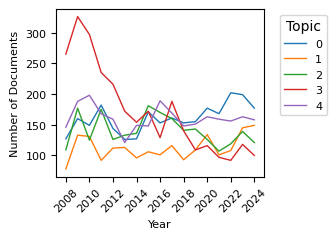

Topic Evolution Table:
Topic     0    1    2    3    4
Year                           
2008.0  127   78  109  265  146
2009.0  160  133  177  326  188
2010.0  149  131  125  297  198
2011.0  182   92  175  235  168
2012.0  144  112  126  216  159
2013.0  126  113  133  172  121
2014.0  127   96  136  154  149
2015.0  171  106  181  172  148
2016.0  153  101  170  129  189
2017.0  161  116  160  188  169
2018.0  153   93  141  140  148
2019.0  155  109  143  109  151
2020.0  177  134  126  116  163
2021.0  168  101  107   97  159
2022.0  202  108  119   92  156
2023.0  199  145  139  118  163
2024.0  177  149  121  100  158


In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Add year column
npr['Year'] = npr['Date'].dt.year

# Filter by date if necessary
npr_filtered = npr[npr['Date'] > '2020-01-01']

# Diachronic analysis after topic modeling
topic_results = LDA.transform(dtm)
npr['Topic'] = topic_results.argmax(axis=1)

# Count topics by year
topic_counts_by_year = npr.groupby(['Year', 'Topic']).size().unstack(fill_value=0)

# Visualize topic evolution over time
fig, ax = plt.subplots(figsize=(3.5, 2.5))  # Ajustado para IEEE

topic_counts_by_year.plot(kind='line', ax=ax, linewidth=1)  # Ajustado para IEEE

# Format x-axis to show only integer years
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.tick_params(axis='both', labelsize=8)  # Ajusta tamaño de números en ejes
ax.xaxis.set_tick_params(rotation=45)  # Rotar etiquetas de años para evitar superposición

plt.xlabel('Year', fontsize=8)
plt.ylabel('Number of Documents', fontsize=8)
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)  # Ajustado para IEEE
plt.tight_layout()

plt.show()

# Print table data separately
print("Topic Evolution Table:")
print(topic_counts_by_year)

In [ ]:
import yaml

# Load explainability terms from YAML file
with open('/content/drive/MyDrive/Tesis/params.yaml', 'r') as f:
    params = yaml.safe_load(f)

explainability_keywords = params['explainability_terms']
explainability_keywords = [term.lower() for term in explainability_keywords]

print("Explainability Keywords:")
print(explainability_keywords)

# Identify explainability topics (assuming LDA components are already computed)
explainability_topics = []
for index, topic in enumerate(LDA.components_):
    top_words = [cv.get_feature_names_out()[i] for i in topic.argsort()[-50:]]
    if any(term in top_words for term in explainability_keywords):
        explainability_topics.append(index)

print("\nPotential explainability topics:", explainability_topics)

Explainability Keywords:
['explain', 'interpret', 'transparent', 'black-box', 'white-box', 'explainable', 'interpretable', 'explainability', 'interpretability', 'resolvable', 'resolvability', 'explicable', 'explicability', 'answerable', 'answerability', 'feasible', 'feasibility', 'solvable', 'solvability', 'accountability', 'outline', 'traceability', 'describe', 'observability', 'observe', 'monitor', 'trace']

Potential explainability topics: []


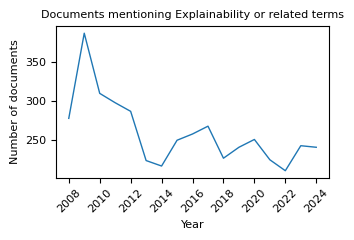

explainability_docs_over_time.csv:
Year,0
2008.0,278
2009.0,387
2010.0,310
2011.0,298
2012.0,287
2013.0,224
2014.0,217
2015.0,250
2016.0,258
2017.0,268
2018.0,227
2019.0,241
2020.0,251
2021.0,225
2022.0,211
2023.0,243
2024.0,241




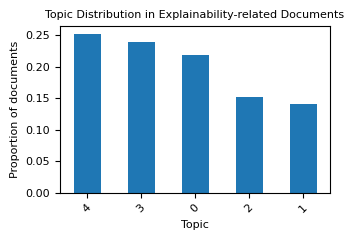

explainability_topic_dist.csv:
Topic,proportion
4,0.2511816340310601
3,0.23857753769975243
0,0.21809588116137746
2,0.15192437542201215
1,0.14022057168579788




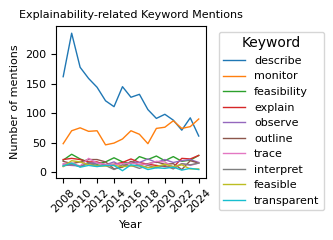

keyword_mentions_over_time.csv:
Year,describe,monitor,feasibility,explain,observe,outline,trace,interpret,feasible,transparent
2008.0,162,48,20,21,12,18,14,10,9,10
2009.0,236,70,30,23,11,14,15,13,19,15
2010.0,178,75,22,21,10,17,10,9,17,8
2011.0,159,69,16,17,15,21,23,14,12,11
2012.0,144,70,13,17,15,21,15,11,10,9
2013.0,121,46,17,12,12,17,13,11,10,11
2014.0,111,49,24,13,17,5,12,4,11,11
2015.0,145,56,17,16,9,8,14,12,9,2
2016.0,127,70,14,22,17,18,15,11,10,12
2017.0,132,64,26,16,16,11,13,6,11,10
2018.0,106,48,21,13,22,14,13,11,7,4
2019.0,91,74,27,11,16,17,18,7,9,7
2020.0,98,76,19,9,21,13,17,11,13,6
2021.0,88,87,26,8,16,14,8,5,9,8
2022.0,71,74,18,23,19,4,14,14,12,3
2023.0,92,77,20,22,21,19,11,12,5,6
2024.0,61,90,28,28,16,15,15,15,5,4




In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# Find documents containing explainability-related keywords
explainability_docs = npr[npr['Detail'].str.contains('|'.join(explainability_keywords), case=False)]

# Analyze the evolution of mentions over time
fig, ax = plt.subplots(figsize=(3.5, 2.5))
explainability_docs_over_time = explainability_docs.groupby('Year').size()
explainability_docs_over_time.plot(kind='line', ax=ax, linewidth=1)
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.tick_params(axis='both', labelsize=8)
ax.xaxis.set_tick_params(rotation=45)
plt.title('Documents mentioning Explainability or related terms', fontsize=8)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Number of documents', fontsize=8)
plt.tight_layout()
plt.show()

# Print the data as a CSV to the console
print('explainability_docs_over_time.csv:')
print(explainability_docs_over_time.to_csv())
print()

# Analyze the distribution of topics in these documents
fig, ax = plt.subplots(figsize=(3.5, 2.5))
explainability_topic_dist = explainability_docs['Topic'].value_counts(normalize=True)
explainability_topic_dist.plot(kind='bar', ax=ax)
ax.tick_params(axis='both', labelsize=8)
ax.xaxis.set_tick_params(rotation=45)
plt.title('Topic Distribution in Explainability-related Documents', fontsize=8)
plt.xlabel('Topic', fontsize=8)
plt.ylabel('Proportion of documents', fontsize=8)
plt.tight_layout()
plt.show()

# Print the data as a CSV to the console
print('explainability_topic_dist.csv:')
print(explainability_topic_dist.to_csv())
print()

# Analyze the evolution of specific keyword mentions
fig, ax = plt.subplots(figsize=(3.5, 2.5), gridspec_kw={'width_ratios': [1.2]})
keyword_mentions = pd.DataFrame({keyword: npr['Detail'].str.contains(keyword, case=False).astype(int) for keyword in explainability_keywords})
keyword_mentions_over_time = keyword_mentions.groupby(npr['Year']).sum()
top_10_keywords = keyword_mentions.sum().nlargest(10).index
keyword_mentions_over_time[top_10_keywords].plot(ax=ax, linewidth=1)
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.tick_params(axis='both', labelsize=8)
ax.xaxis.set_tick_params(rotation=45)
plt.title('Explainability-related Keyword Mentions', fontsize=8)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Number of mentions', fontsize=8)
plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

# Print the data as a CSV to the console
print('keyword_mentions_over_time.csv:')
print(keyword_mentions_over_time[top_10_keywords].to_csv())
print()

Keywords data loaded from existing file.


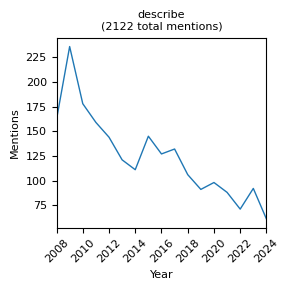

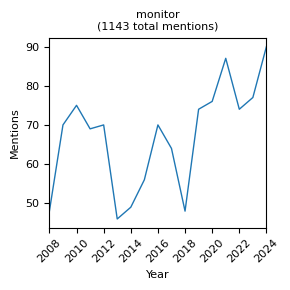

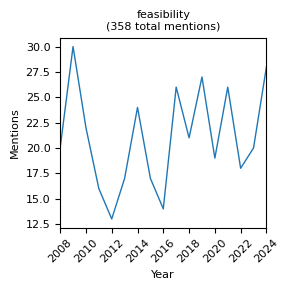

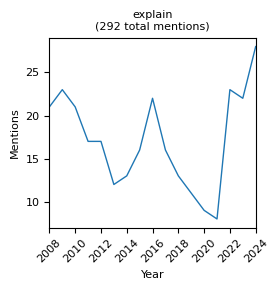

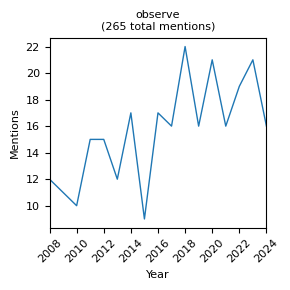

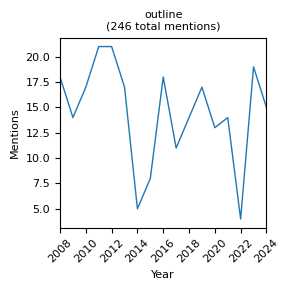

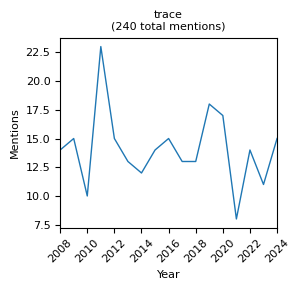

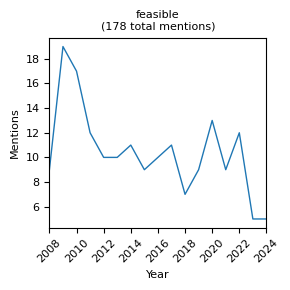

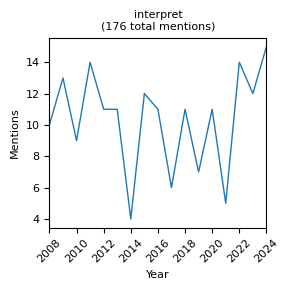

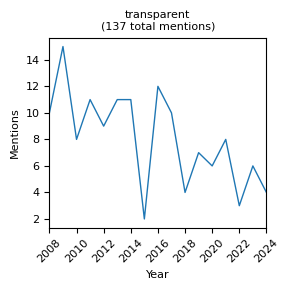

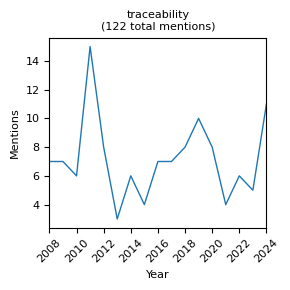

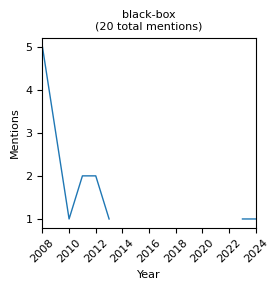

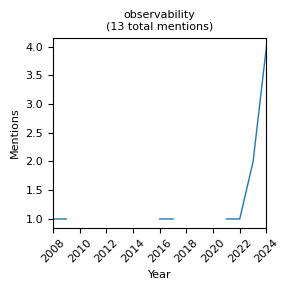

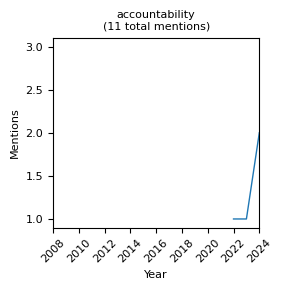

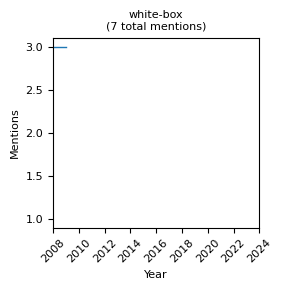

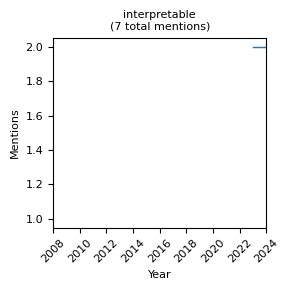

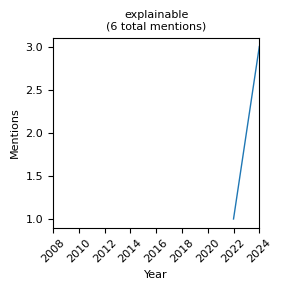

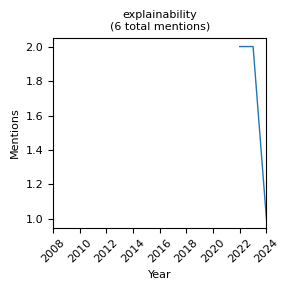

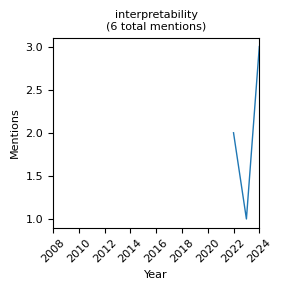

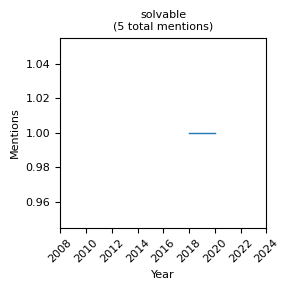

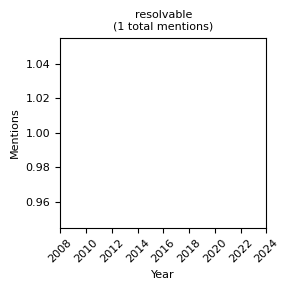

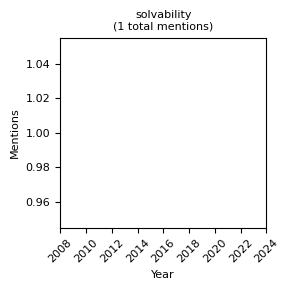

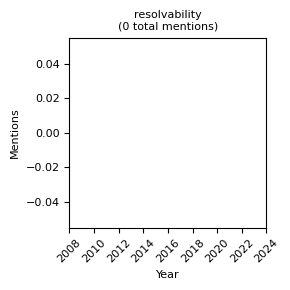

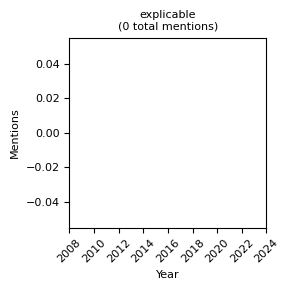

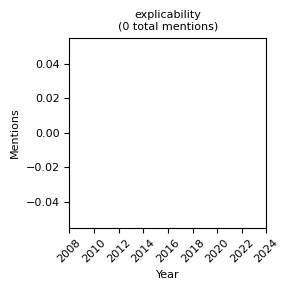

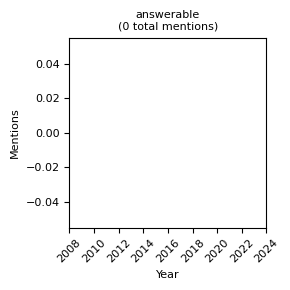

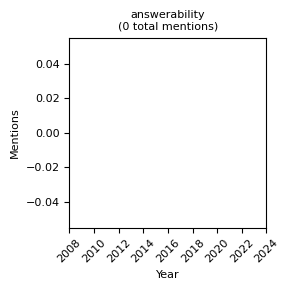


Summary Statistics (ordered by total mentions):

describe:
Total mentions: 2122
Peak mentions: 236 (Year: 2009.0)

monitor:
Total mentions: 1143
Peak mentions: 90 (Year: 2024.0)

feasibility:
Total mentions: 358
Peak mentions: 30 (Year: 2009.0)

explain:
Total mentions: 292
Peak mentions: 28 (Year: 2024.0)

observe:
Total mentions: 265
Peak mentions: 22 (Year: 2018.0)

outline:
Total mentions: 246
Peak mentions: 21 (Year: 2011.0)

trace:
Total mentions: 240
Peak mentions: 23 (Year: 2011.0)

feasible:
Total mentions: 178
Peak mentions: 19 (Year: 2009.0)

interpret:
Total mentions: 176
Peak mentions: 15 (Year: 2024.0)

transparent:
Total mentions: 137
Peak mentions: 15 (Year: 2009.0)

traceability:
Total mentions: 122
Peak mentions: 15 (Year: 2011.0)

black-box:
Total mentions: 20
Peak mentions: 5 (Year: 2008.0)

observability:
Total mentions: 13
Peak mentions: 4 (Year: 2024.0)

accountability:
Total mentions: 11
Peak mentions: 3 (Year: 2012.0)

white-box:
Total mentions: 7
Peak mention

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import math
import os
from tqdm import tqdm

# Results file
keywords_file = f'keywords_data_{data_file}'

# Full path of results file
keywords_path = f'{path}{keywords_file}'

# Check if keywords file already exists
if keywords_file in os.listdir(path):
    # Load existing results
    keywords_data = pd.read_csv(keywords_path)
    print("Keywords data loaded from existing file.")
else:
    # Create a DataFrame to store mentions of each keyword over time
    keywords_data = pd.DataFrame()

    # Ensure we have all years from 2008 to 2024
    full_year_range = pd.DataFrame({'Year': range(2008, 2025)})

    # For each keyword, count mentions per year
    for keyword in tqdm(explainability_keywords, desc="Processing keywords"):
        yearly_counts = npr[npr['Detail'].str.contains(keyword, case=False)].groupby('Year').size()
        # Convert to DataFrame and merge with full year range to ensure all years are present
        keyword_df = pd.DataFrame(yearly_counts).reset_index()
        keyword_df.columns = ['Year', keyword]
        full_data = pd.merge(full_year_range, keyword_df, on='Year', how='left')
        keywords_data[keyword] = full_data[keyword].fillna(0)

    # Add Year column
    keywords_data['Year'] = range(2008, 2025)

    # Save to CSV
    keywords_data.to_csv(keywords_path, index=False)
    print("Keywords data saved to file.")

# Calculate total mentions for each keyword to determine order
keyword_totals = {col: keywords_data[col].sum() for col in keywords_data.columns if col != 'Year'}
sorted_keywords = sorted(keyword_totals.items(), key=lambda x: x[1], reverse=True)

# Create plots in series of 3
plt.ioff()  # Turn off interactive mode
for i in range(0, len(sorted_keywords), 3):
    # Create a batch of up to 3 plots
    batch_keywords = sorted_keywords[i:i+3]

    # Create the plots for this batch
    for j, (keyword, total) in enumerate(batch_keywords):
        fig, ax = plt.subplots(figsize=(3, 3))

        # Plot data without label
        keywords_data.plot(x='Year', y=keyword, ax=ax, linewidth=1, label='')
        ax.set_title(f'{keyword}\n({total:.0f} total mentions)', fontsize=8)
        ax.set_xlabel('Year', fontsize=8)
        ax.set_ylabel('Mentions', fontsize=8)
        ax.tick_params(axis='both', labelsize=8)

        # Set x-axis range and ticks
        ax.set_xlim(2008, 2024)
        ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
        ax.xaxis.set_tick_params(rotation=45)

        # Remove legend
        ax.get_legend().remove()

        plt.tight_layout()

        # Save the plot
        plot_filename = f'{path}keyword_plot_{keyword.replace(" ", "_")}.png'
        plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

    # Add a newline after each batch of 3
    if i + 3 < len(sorted_keywords):
        print("\n")

plt.ion()  # Turn interactive mode back on

# Print summary statistics for each keyword in order
print("\nSummary Statistics (ordered by total mentions):")
for keyword, total in sorted_keywords:
    max_mentions = keywords_data[keyword].max()
    # Safe way to find the year of maximum mentions
    if max_mentions > 0:  # Only find max year if there are mentions
        max_year = keywords_data.loc[keywords_data[keyword] == max_mentions, 'Year'].iloc[0]
    else:
        max_year = "No mentions"

    print(f"\n{keyword}:")
    print(f"Total mentions: {total:.0f}")
    print(f"Peak mentions: {max_mentions:.0f} (Year: {max_year})")

Academic data loaded.
StackOverflow data loaded.
Dzone data loaded.
InfoQ data loaded.

Data Used for Charts:

Academic Data:
Year,explain,interpret,transparent,black-box,white-box,explainable,interpretable,explainability,interpretability,resolvable,resolvability,explicable,explicability,answerable,answerability,feasible,feasibility,solvable,solvability,accountability,outline,traceability,describe,observability,observe,monitor,trace
2008.0,21,10,10,5.0,3.0,,,,,1.0,,,,,,9,20,1.0,,1.0,18,7,162,1.0,12,48,14
2009.0,23,13,15,3.0,3.0,,,,,,,,,,,19,30,,,,14,7,236,1.0,11,70,15
2010.0,21,9,8,1.0,,,,,,,,,,,,17,22,,1.0,1.0,17,6,178,,10,75,10
2011.0,17,14,11,2.0,,,,,,,,,,,,12,16,,,,21,15,159,,15,69,23
2012.0,17,11,9,2.0,1.0,,,,,,,,,,,10,13,,,3.0,21,8,144,,15,70,15
2013.0,12,11,11,1.0,,,,,,,,,,,,10,17,,,,17,3,121,,12,46,13
2014.0,13,4,11,,,,,,,,,,,,,11,24,1.0,,,5,6,111,1.0,17,49,12
2015.0,16,12,2,2.0,,,,,,,,,,,,9,17,,,,8,4,145,,9,56,14
2016.0,22,11,12,,,,,,,,,,,,,10,14,,,,18,7,127,1.0,17,70,15
2017.

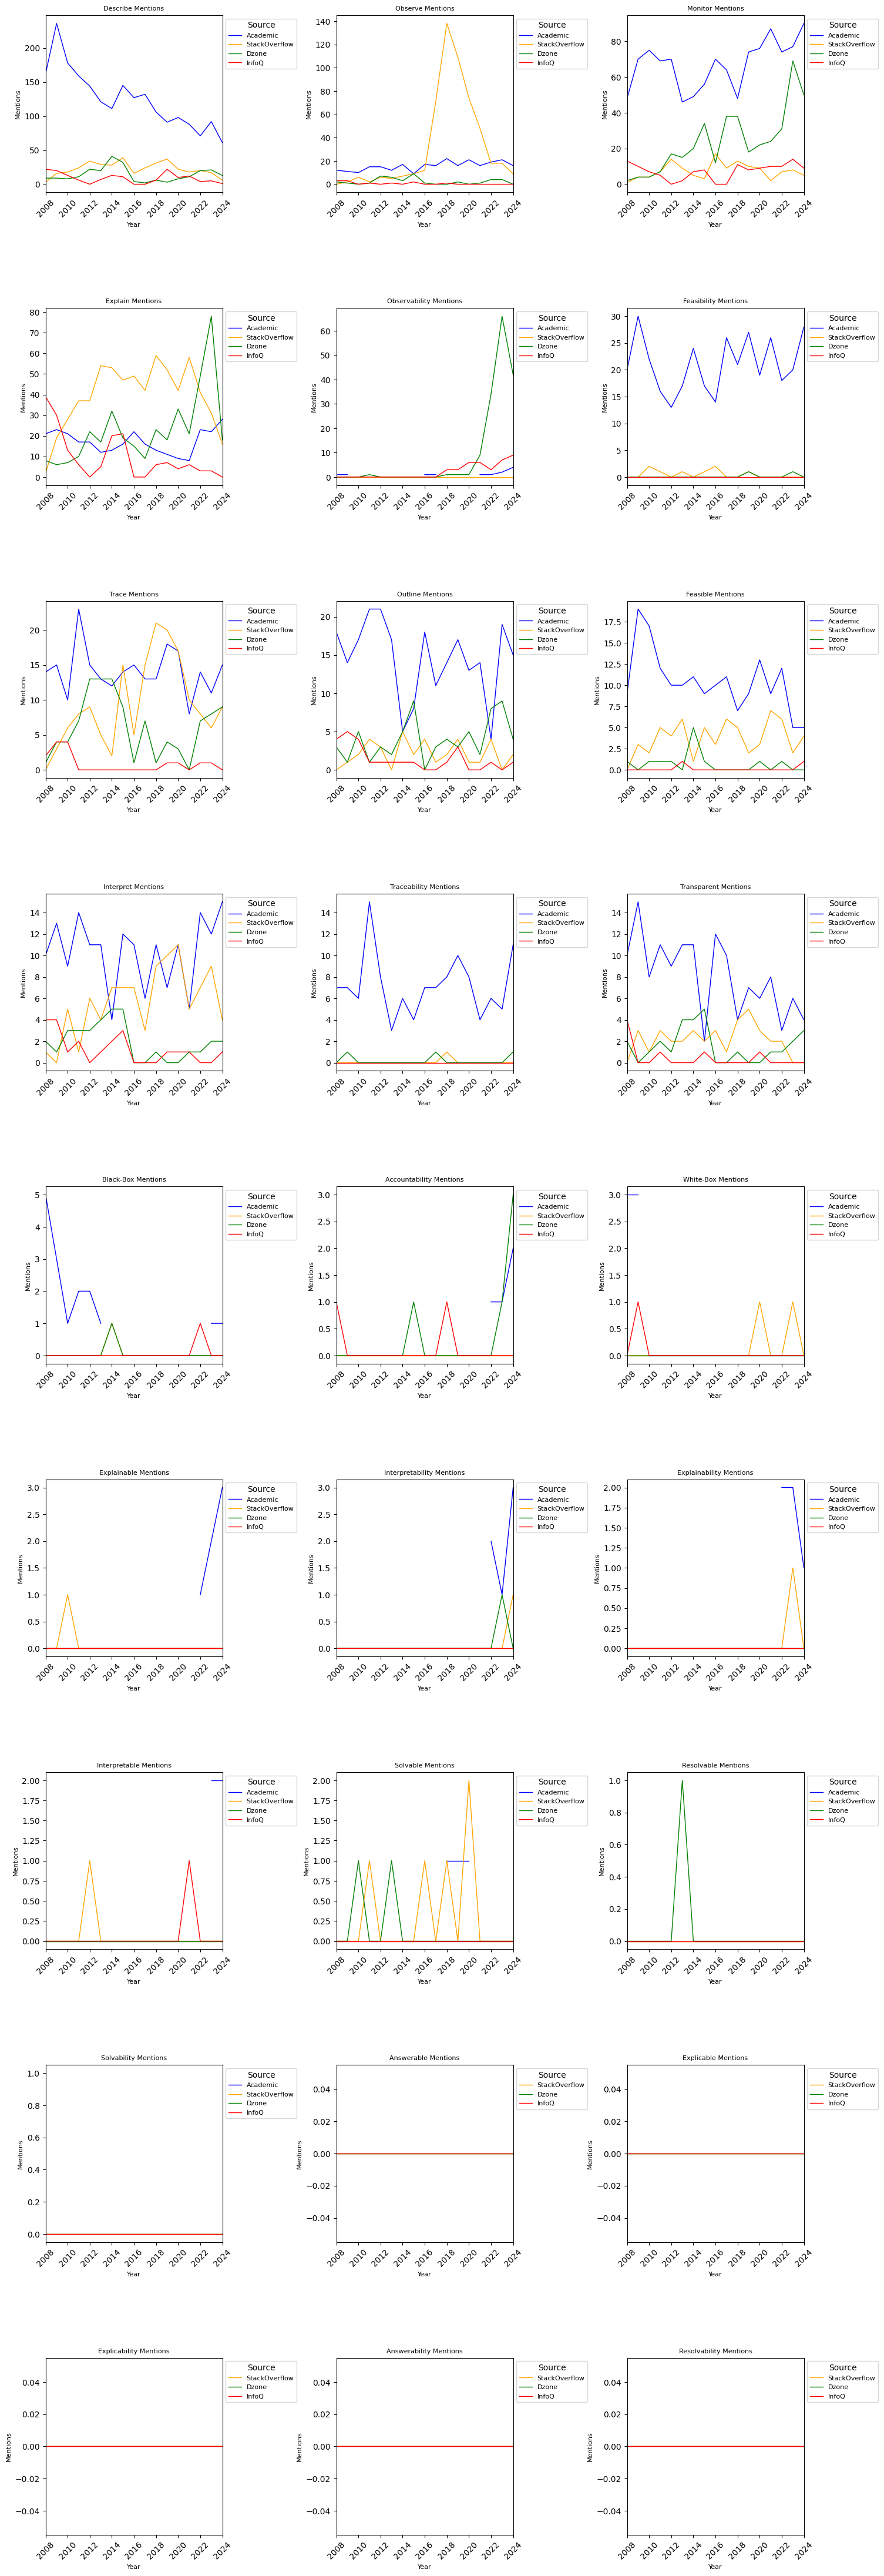

Combined keyword comparison chart saved.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os
import math
from tqdm import tqdm

# Load data from multiple files
sources = {
    'Academic': 'keywords_data_academic-corpus.csv',
    'StackOverflow': 'keywords_data_corpus-stack-overflow-architecture-2.csv',
    'Dzone': 'keywords_data_dzone_architecture_design_news_date_cleaned.csv',
    'InfoQ': 'keywords_data_infoq_architecture_design_news_cleaned.csv'
}

# Dictionary to store data for each source
dataframes = {}
for source, filename in sources.items():
    filepath = os.path.join(path, filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        if 'Year' not in df.columns:
            df.rename(columns={df.columns[0]: 'Year'}, inplace=True)
        dataframes[source] = df
        print(f"{source} data loaded.")
    else:
        print(f"File not found for {source}.")

import sys

# Print data used for charts
print("\nData Used for Charts:")
for source, df in dataframes.items():
    print(f"\n{source} Data:")
    df.to_csv(sys.stdout, sep=',', index=False)
    print(f"Shape: {df.shape}")  # Print dataset shape (rows, columns)

# Print merged data
print("\nMerged Data:")
merged_data.to_csv(sys.stdout, sep=',', index=False)
print(f"Shape: {merged_data.shape}")  # Print merged dataset shape (rows, columns)

# Merge all data on 'Year' for consistent comparison
merged_data = pd.DataFrame({'Year': range(2008, 2025)})
for source, df in dataframes.items():
    if 'Year' in df.columns:
        keyword_columns = [col for col in df.columns if col != 'Year']
        df = df[['Year'] + keyword_columns]
        df.columns = ['Year'] + [f"{col}_{source}" for col in keyword_columns]
        merged_data = pd.merge(merged_data, df, on='Year', how='left')

# Define colors for each source
source_colors = {
    'Academic': 'blue',
    'StackOverflow': 'orange',
    'Dzone': 'green',
    'InfoQ': 'red'
}

# Extract unique keywords and calculate their maximum values
keywords = set(col.split('_')[0] for col in merged_data.columns if col != 'Year')
keyword_max_values = {}

for keyword in keywords:
    max_value = 0
    for source in sources.keys():
        col_name = f"{keyword}_{source}"
        if col_name in merged_data.columns:
            max_value = max(max_value, merged_data[col_name].max())
    keyword_max_values[keyword] = max_value

# Sort keywords by their maximum values
sorted_keywords = sorted(keyword_max_values.items(), key=lambda x: x[1], reverse=True)
sorted_keywords = [k for k, v in sorted_keywords]

# Calculate grid dimensions
num_keywords = len(sorted_keywords)
num_cols = 3
num_rows = math.ceil(num_keywords / num_cols)

# Create subplot grid
plt.ioff()  # Turn off interactive mode

# Adjust figure size to make subplots more square
# Increase width relative to height for each subplot
fig = plt.figure(figsize=(15, 15 * num_rows / num_cols))  # This maintains square aspect ratio

for idx, keyword in enumerate(sorted_keywords):
    ax = plt.subplot(num_rows, num_cols, idx + 1)
    data_plotted = False

    # Plot data for each source if it exists and contains data
    for source, color in source_colors.items():
        source_col = f"{keyword}_{source}"
        if source_col in merged_data.columns and merged_data[source_col].notna().any():
            merged_data.plot(
                x='Year', y=source_col, ax=ax, color=color, linewidth=1,
                label=source
            )
            data_plotted = True

    if data_plotted:
        # Formatting
        ax.set_title(f'{keyword.replace("_", " ").title()} Mentions', fontsize=8)
        ax.set_xlabel('Year', fontsize=8)
        ax.set_ylabel('Mentions', fontsize=8)
        ax.set_xlim(2008, 2024)
        ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
        ax.xaxis.set_tick_params(rotation=45)

        # Place the legend outside the chart
        ax.legend(title='Source', fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))

        # Set aspect ratio to be more square
        ax.set_box_aspect(1)  # This makes the plot square
    else:
        print(f"No data to plot for keyword: {keyword}")

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the entire figure
plot_filename = f'{path}keyword_comparison_grid.png'
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

plt.ion()  # Turn interactive mode back on
print("Combined keyword comparison chart saved.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

# Load both datasets
academic_data = pd.read_csv('keywords_data_academic-corpus.csv', index_col=0)
infoq_data = pd.read_csv('keywords_data_infoq_architecture_design_news_cleaned.csv', index_col=0)

# Convert index to numeric if they're years
for df in [academic_data, infoq_data]:
    if df.index.dtype == 'O':  # Object dtype usually means strings
        try:
            df.index = pd.to_numeric(df.index)
        except:
            pass

# Get common keywords
keywords = academic_data.columns.intersection(infoq_data.columns)

# Setup the plotting grid
n_cols = 3
n_rows = int(np.ceil(len(keywords) / n_cols))
subplot_size = 2.5

# Create figure
fig = plt.figure(figsize=(subplot_size * n_cols, subplot_size * n_rows))

# Print keywords for reference
print("Keywords being compared:")
for idx, keyword in enumerate(keywords, 1):
    print(f"{idx}. {keyword}")

# Plot comparisons for each keyword
for idx, keyword in enumerate(keywords):
    ax = plt.subplot(n_rows, n_cols, idx + 1)

    # Plot both trends
    academic_data[keyword].plot(ax=ax, linewidth=1.5, marker='o', markersize=3,
                              label='Academic', color='blue')
    infoq_data[keyword].plot(ax=ax, linewidth=1.5, marker='s', markersize=3,
                            label='InfoQ', color='red')

    # Customize the plot
    ax.set_title(f"'{keyword}'", fontsize=8, pad=5)
    ax.set_xlabel('Year', fontsize=8)
    ax.set_ylabel('Count', fontsize=8)

    # Format axes
    ax.tick_params(axis='both', labelsize=7)
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True, nbins=5))
    ax.xaxis.set_tick_params(rotation=45)

    # Add grid and legend
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=6, loc='upper left')

    # Ensure y-axis starts at 0
    ax.set_ylim(bottom=0)

    # Make plot square and adjust margins
    ax.set_aspect('auto')
    ax.margins(x=0.1)

# Adjust layout to prevent overlap
plt.tight_layout(pad=1.0, h_pad=0.5, w_pad=0.5)
plt.show()

# Print some statistical comparisons
print("\nStatistical Comparisons:")
print("-----------------------")
for keyword in keywords:
    academic_total = academic_data[keyword].sum()
    infoq_total = infoq_data[keyword].sum()
    academic_max = academic_data[keyword].max()
    infoq_max = infoq_data[keyword].max()
    academic_max_year = academic_data[keyword].idxmax()
    infoq_max_year = infoq_data[keyword].idxmax()

    print(f"\nKeyword: {keyword}")
    print(f"Total mentions - Academic: {academic_total:.0f}, InfoQ: {infoq_total:.0f}")
    print(f"Peak mentions - Academic: {academic_max:.0f} ({academic_max_year}), "
          f"InfoQ: {infoq_max:.0f} ({infoq_max_year})")

# Optional: Create a correlation matrix
correlations = {}
for keyword in keywords:
    # Get the overlapping years
    common_years = set(academic_data.index) & set(infoq_data.index)
    if common_years:
        academic_series = academic_data.loc[common_years, keyword]
        infoq_series = infoq_data.loc[common_years, keyword]
        corr = academic_series.corr(infoq_series)
        correlations[keyword] = corr

if correlations:
    print("\nTrend Correlations between Academic and InfoQ:")
    print("-----------------------------------------")
    for keyword, corr in correlations.items():
        print(f"{keyword}: {corr:.3f}")

FileNotFoundError: [Errno 2] No such file or directory: 'keywords_data_academic-corpus.csv'

In [ ]:
# First, let's remove the duplicate file
import os

# Remove duplicate file if you want
if os.path.exists('keywords_data_academic-corpus.csv.csv'):
    os.remove('keywords_data_academic-corpus.csv.csv')

# For InfoQ corpus, we need to first save the data
results_file = 'infoq_architecture_design_news_cleaned'
keyword_data_infoq = save_or_load_keyword_data(keyword_mentions_over_time, results_file, explainability_keywords)

# Verify files again
files_to_check = [
    'keywords_data_academic-corpus.csv',
    'keywords_data_infoq_architecture_design_news_cleaned.csv'
]

print("\nChecking files after setup:")
for file in files_to_check:
    exists = os.path.exists(file)
    print(f"'{file}': {'EXISTS' if exists else 'NOT FOUND'}")

In [ ]:
for idx, topic in enumerate(LDA.components_):
    topic_words = [cv.get_feature_names_out()[i] for i in topic.argsort()[-100:]]
    explainable_words = [word for word in topic_words if word in explainability_keywords]
    print(f"Tópico {idx + 1} - Palabras relacionadas con explainability: {explainable_words}")

# Análisis de co-ocurrencia
from sklearn.feature_extraction.text import CountVectorizer

# Crear un nuevo vectorizador que incluya los términos de explainability
cv_explain = CountVectorizer(vocabulary=explainability_keywords)
dtm_explain = cv_explain.fit_transform(npr['Detail'])

# Calcular la co-ocurrencia
co_occurrence = (dtm.T @ dtm_explain).toarray()

# Mostrar las 10 palabras que más co-ocurren con cada término de explainability
for idx, keyword in enumerate(explainability_keywords):
    top_co_words = [cv.get_feature_names_out()[i] for i in co_occurrence[:, idx].argsort()[-10:]]
    print(f"Palabras que co-ocurren con '{keyword}': {top_co_words}")